In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load the dataset
vocab_size = 10000
max_len = 250

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1
)


loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')


def predict_review(review):
    prediction = model.predict(np.array([review]))
    return "Positive" if prediction > 0.5 else "Negative"

sample_review = x_test[0]
print(f"Prediction: {predict_review(sample_review)}")
print(f"Actual: {'Positive' if y_test[0] else 'Negative'}")
pr

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6172 - loss: 0.6570 - val_accuracy: 0.8478 - val_loss: 0.4035
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8521 - loss: 0.3656 - val_accuracy: 0.8690 - val_loss: 0.3201
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8985 - loss: 0.2638 - val_accuracy: 0.8598 - val_loss: 0.3154
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9120 - loss: 0.2283 - val_accuracy: 0.8846 - val_loss: 0.2867
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9249 - loss: 0.1943 - val_accuracy: 0.8852 - val_loss: 0.2811
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9313 - loss: 0.1771 - val_accuracy: 0.8886 - val_loss: 0.2803
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9438 - loss: 0.1588 - val_accuracy: 0.8820 - val_loss: 0.2994
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step -

In [ ]:
!pip install wordcloud

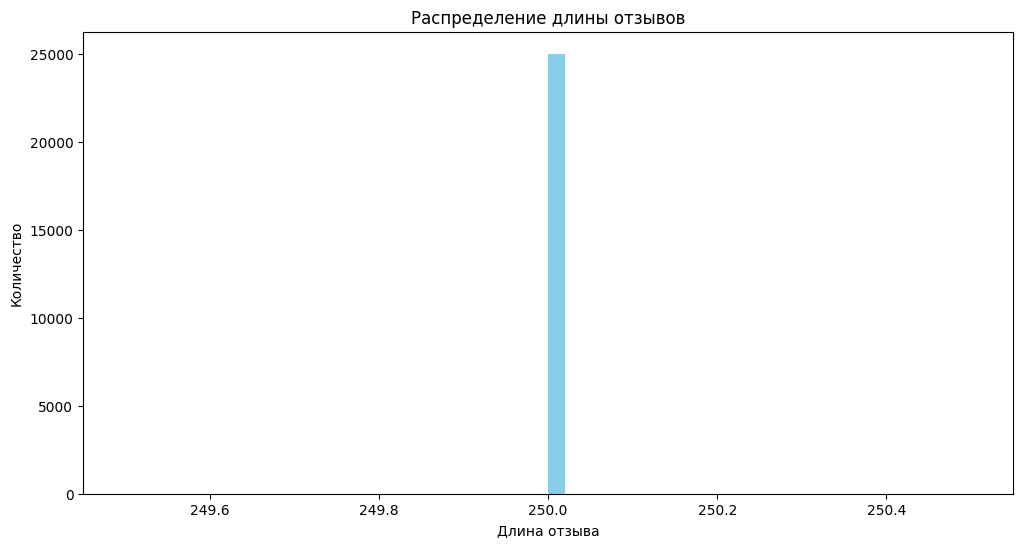

<ipython-input-3-991679769b73>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


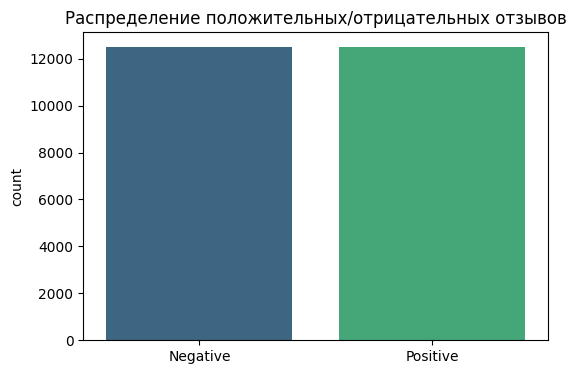

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


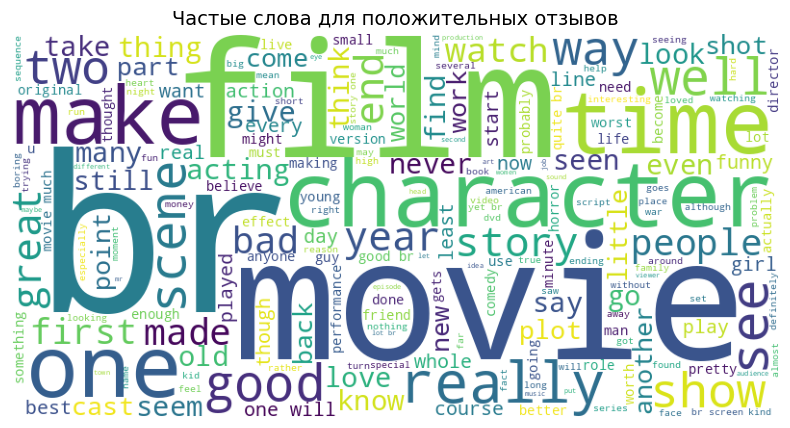

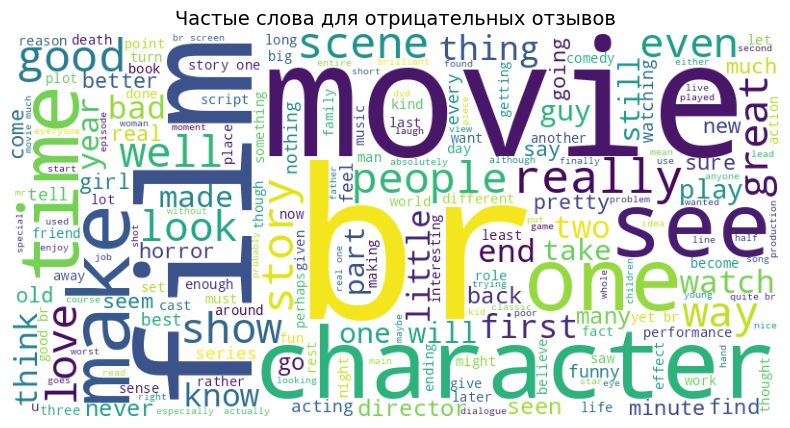

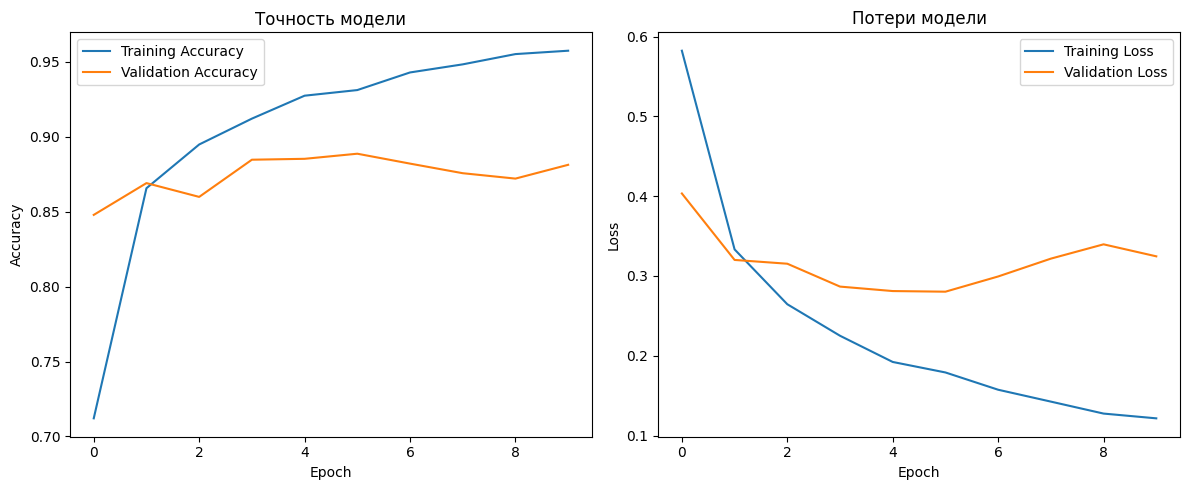

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


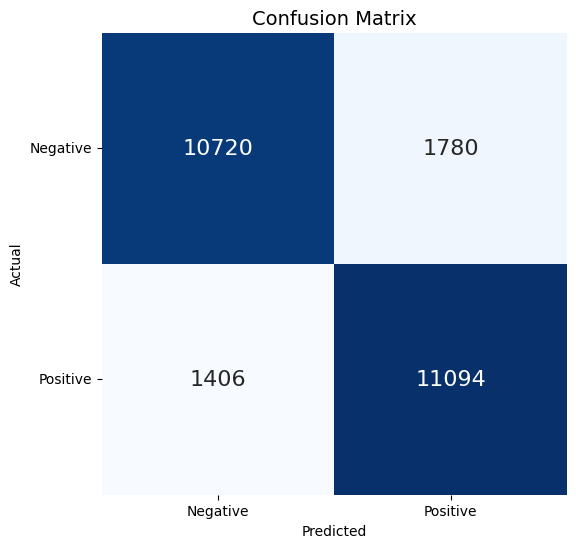

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Визуализация распределения длины отзывов
review_lengths = [len(review) for review in x_train]
plt.figure(figsize=(12, 6))
plt.hist(review_lengths, bins=50, color='skyblue')
plt.title('Распределение длины отзывов')
plt.xlabel('Длина отзыва')
plt.ylabel('Количество')
plt.show()

# 2. Классовый баланс
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='viridis')
plt.title('Распределение положительных/отрицательных отзывов')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# 3. Word Cloud для частых слов
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def get_word_cloud(label):
    words = []
    for i in range(len(x_train)):
        if y_train[i] == label:
            words.extend([reverse_word_index.get(word, '?') for word in x_train[i]])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.title(f'Частые слова для {"положительных" if label else "отрицательных"} отзывов', fontsize=14)
    plt.axis('off')
    plt.show()

get_word_cloud(1)  # Для положительных отзывов
get_word_cloud(0)  # Для отрицательных отзывов

# 4. Графики обучения модели
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точность модели')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Потери модели')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Confusion Matrix (требует предсказаний)
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=False,
            annot_kws={'size': 16})
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.show()